

# Crimes in Chicago



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium


In [ ]:
#Read the data using pandas read_csv function
data = pd.read_csv('/Users/zamiulalam/Documents/Data_Science/datasets/Crimes_-_2001_to_Present_20250301.csv')

In [ ]:
#Print the first 5 rows of the data using head function of pandas
data.head()


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13311263,JG503434,07/29/2022 03:39:00 AM,023XX S TROY ST,1582,OFFENSE INVOLVING CHILDREN,CHILD PORNOGRAPHY,RESIDENCE,True,False,...,25.0,30.0,17,NaN,NaN,2022,04/18/2024 03:40:59 PM,NaN,NaN,NaN
1,13053066,JG103252,01/03/2023 04:44:00 PM,039XX W WASHINGTON BLVD,2017,NARCOTICS,MANUFACTURE / DELIVER - CRACK,SIDEWALK,True,False,...,28.0,26.0,18,NaN,NaN,2023,01/20/2024 03:41:12 PM,NaN,NaN,NaN
2,11227634,JB147599,08/26/2017 10:00:00 AM,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,42.0,32.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
3,13203321,JG415333,09/06/2023 05:00:00 PM,002XX N Wells st,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,42.0,32.0,14,1174694.0,1901831.0,2023,11/04/2023 03:40:18 PM,41.886018,-87.633938,"(41.886018055, -87.633937881)"
4,13204489,JG416325,09/06/2023 11:00:00 AM,0000X E 8TH ST,0810,THEFT,OVER $500,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,4.0,32.0,06,1176857.0,1896680.0,2023,11/04/2023 03:40:18 PM,41.871835,-87.626151,"(41.871834768, -87.62615082)"


In [ ]:
#Describe the data using the describe function of pandas
desc_stats = data.describe()
desc_stats

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,8.264669e+06,8.264669e+06,8.264622e+06,7.649842e+06,7.651216e+06,8.173138e+06,8.173138e+06,8.264669e+06,8.173138e+06,8.173138e+06
mean,7.394806e+06,1.184311e+03,1.129806e+01,2.277978e+01,3.740365e+01,1.164636e+06,1.885888e+06,2.010738e+03,4.184247e+01,-8.767136e+01
std,3.712662e+06,7.036300e+02,6.961502e+00,1.385708e+01,2.154764e+01,1.696427e+04,3.245012e+04,6.869121e+00,8.928205e-02,6.147062e-02
min,6.340000e+02,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.001000e+03,3.661945e+01,-9.168657e+01
25%,3.990733e+06,6.210000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.153044e+06,1.859186e+06,2.005000e+03,4.176890e+01,-8.771346e+01
50%,7.393787e+06,1.034000e+03,1.000000e+01,2.300000e+01,3.200000e+01,1.166183e+06,1.890950e+06,2.010000e+03,4.185635e+01,-8.766566e+01
75%,1.072636e+07,1.731000e+03,1.700000e+01,3.400000e+01,5.600000e+01,1.176391e+06,1.909398e+06,2.016000e+03,4.190706e+01,-8.762808e+01
max,1.376038e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951622e+06,2.025000e+03,4.202291e+01,-8.752453e+01


In [ ]:
#Find the number of missing values in each column
missing_values = data.isnull().sum()

#Turn the missing value counts into percentages
missing_values_percentage = (missing_values / len(data)) * 100

#Return counts and percentages of missing values in each column
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_values_percentage})

missing_data.sort_values(by='Percentage (%)', ascending=False)

,Missing Values,Percentage (%)
Ward,614827,7.439221
Community Area,613453,7.422596
Location,91531,1.107497
Longitude,91531,1.107497
Latitude,91531,1.107497
Y Coordinate,91531,1.107497
X Coordinate,91531,1.107497
Location Description,14008,0.169493
District,47,0.000569
Domestic,0,0.000000


Headers =  ['ID' 'Case Number' 'Date' 'Block' 'IUCR' 'Primary Type' 'Description'
 'Location Description' 'Arrest' 'Domestic' 'Beat' 'District' 'Ward'
 'Community Area' 'FBI Code' 'X Coordinate' 'Y Coordinate' 'Year'
 'Updated On' 'Latitude' 'Longitude' 'Location']


/var/folders/rz/xn1t5mlj5wv1k082mq_q2hdr0000gn/T/ipykernel_3439/3493649096.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_factors.index, y=top_factors.values, palette="magma")


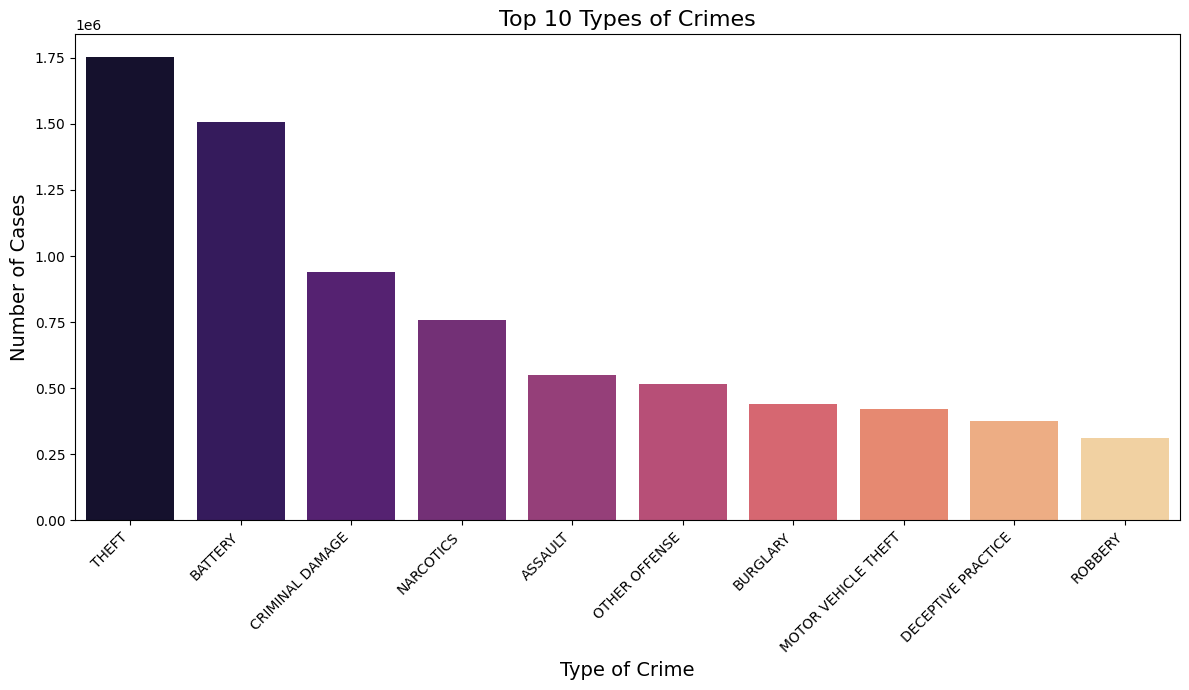

In [ ]:
# Removing unncescary spaces in the top row and checking if removed
data.columns = data.columns.str.lstrip()
column_names = data.columns.values
column_names[1] = 'Case Number'
print("Headers = ",column_names)

# Plot a Bar Chart
top_factors = data['Primary Type'].value_counts().head(10)

plt.figure(figsize=(12, 7))

# Plotting the top 10 types of crimes
sns.barplot(x=top_factors.index, y=top_factors.values, palette="magma")
plt.title('Top 10 Types of Crimes', fontsize=16)
plt.xlabel('Type of Crime', fontsize=14)
plt.ylabel('Number of Cases', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()





/var/folders/rz/xn1t5mlj5wv1k082mq_q2hdr0000gn/T/ipykernel_3439/3810804119.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_crime_locations.index, y=top_crime_locations.values, palette="cividis")


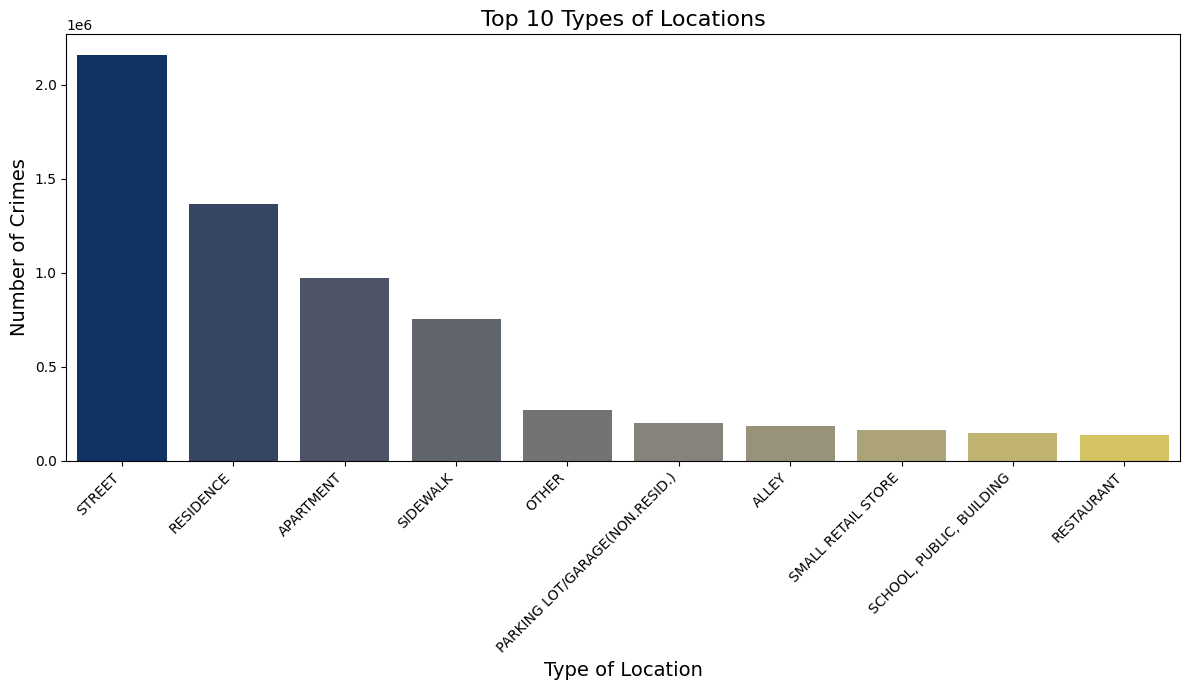

In [ ]:
# Determine the top types of locations for crimes
top_crime_locations = data['Location Description'].value_counts().head(10)

# Plotting the top types of locations
plt.figure(figsize=(12, 7))
sns.barplot(x=top_crime_locations.index, y=top_crime_locations.values, palette="cividis")
plt.title('Top 10 Types of Locations', fontsize=16)
plt.xlabel('Type of Location', fontsize=14)
plt.ylabel('Number of Crimes', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


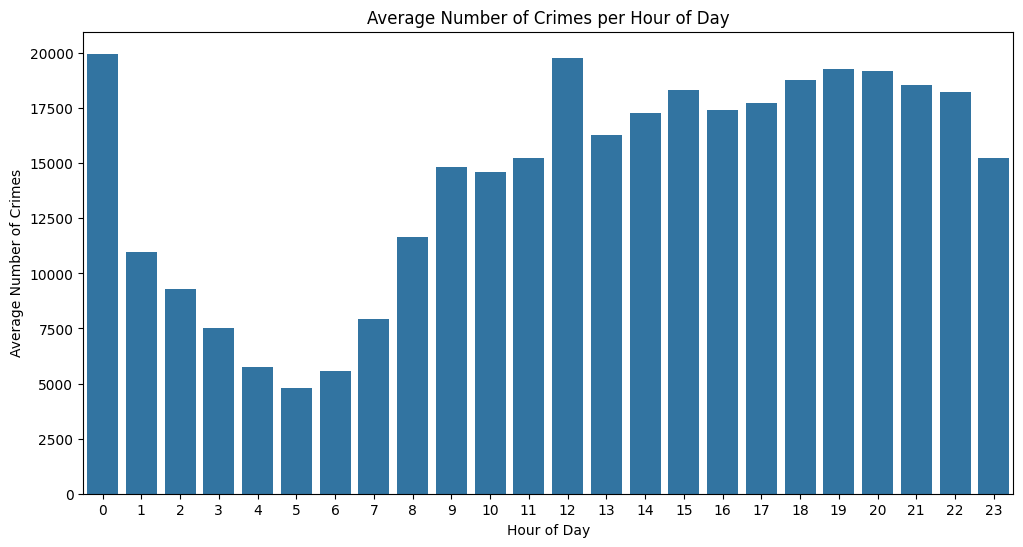

In [ ]:
# Convert 'DATE OF OCCURRENCE' to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Time of Day Analysis
data['Hour of Day'] = data['Date'].dt.hour

# Group by 'Hour of Day' and calculate the average number of crimes per hour
average_crimes_per_hour = data.groupby('Hour of Day').size() / data['Hour of Day'].nunique()


# Plot the average number of crimes
plt.figure(figsize=(12, 6))
sns.barplot(x=average_crimes_per_hour.index, y=average_crimes_per_hour.values)
plt.title('Average Number of Crimes per Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Crimes')
plt.xticks(range(0, 24))
plt.show()



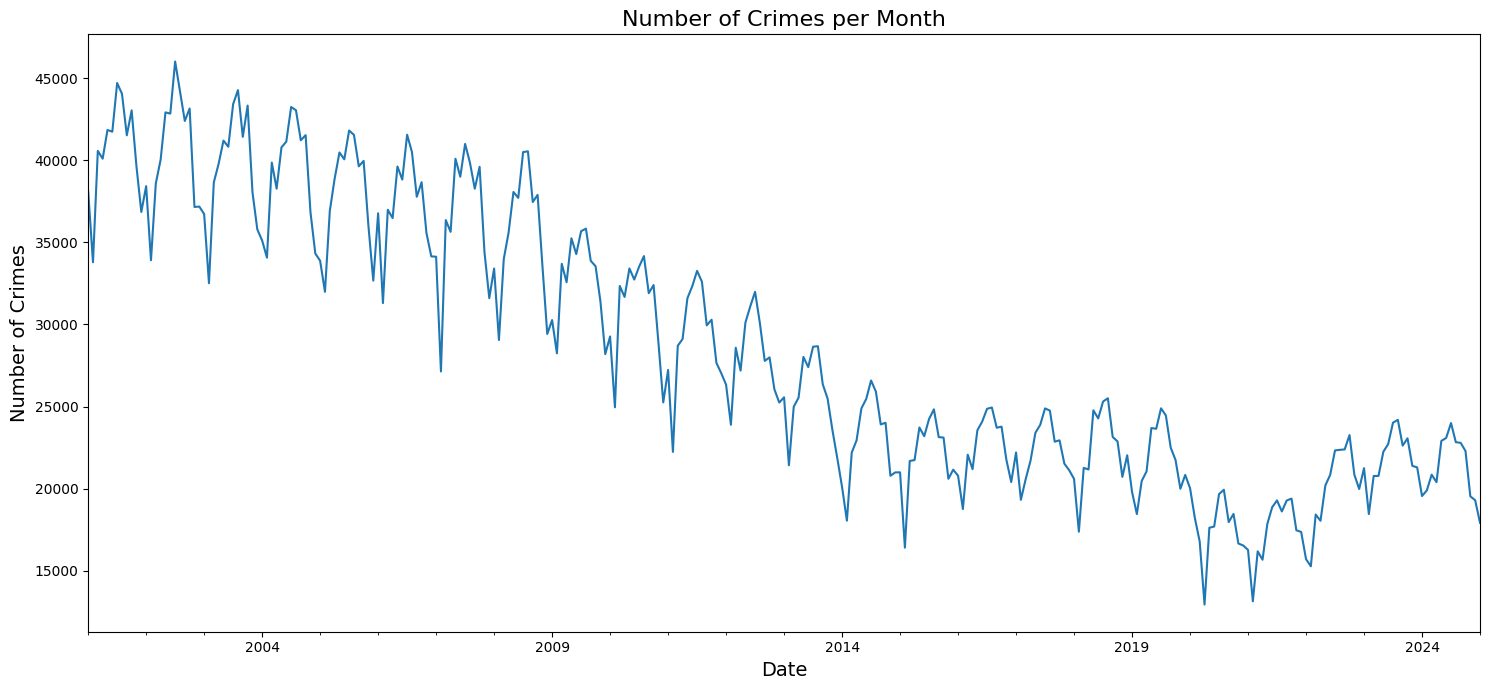

In [ ]:
# Convert 'CRASH DATE' to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Exclude February 2025 as data is incomplete for Feb 2025
data = data[~((data['Date'].dt.year == 2025) & (data['Date'].dt.month == 2))]

# Group by month and year to get the number of crashes per month
monthly_crimes = data.groupby(data['Date'].dt.to_period("M")).size()


# Plotting the trend over time
plt.figure(figsize=(15, 7))
monthly_crimes.plot()
plt.title('Number of Crimes per Month', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Crimes', fontsize=14)
plt.tight_layout()
plt.show()


/var/folders/rz/xn1t5mlj5wv1k082mq_q2hdr0000gn/T/ipykernel_3439/3997672606.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= ward_count.index, y= ward_count.values, palette="viridis")


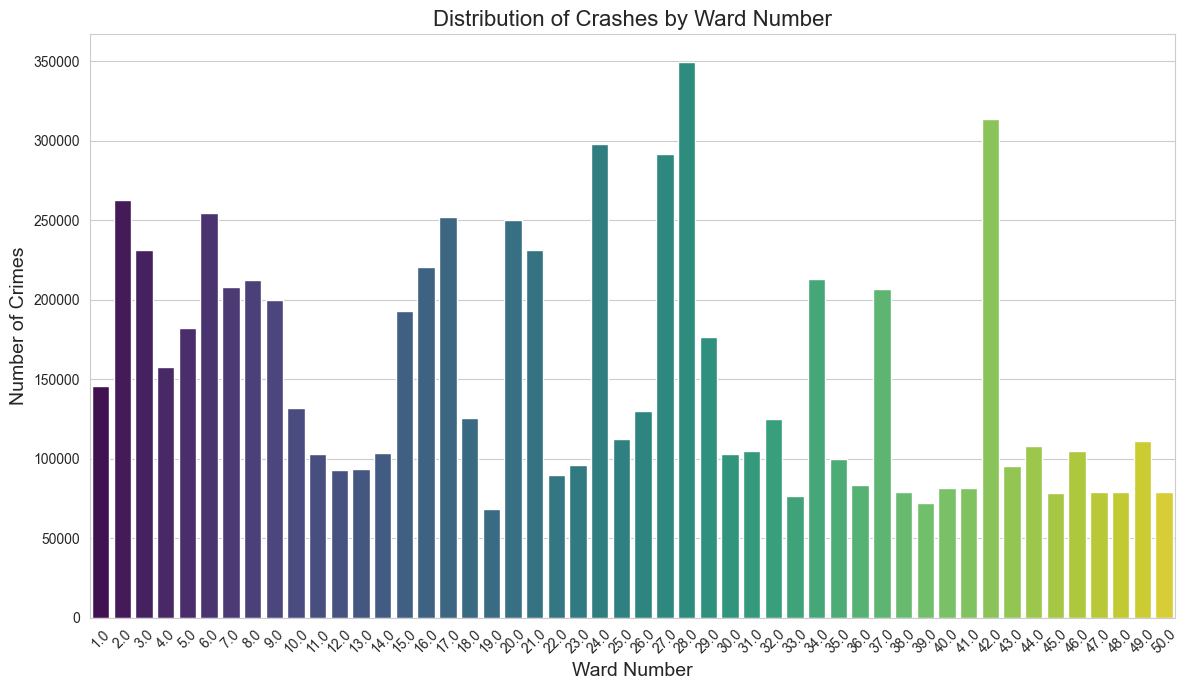

In [ ]:
# Plotting the distribution of crashes by ward
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

# Find the count of unique values of ward
ward_count = data['Ward'].value_counts()
sns.barplot(x= ward_count.index, y= ward_count.values, palette="viridis")
plt.title('Distribution of Crashes by Ward Number', fontsize=16)
plt.xlabel('Ward Number', fontsize=14)
plt.ylabel('Number of Crimes', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Create a heatmap leveraging the latitude and longitude variables to determine where the most crimes are occurring
from folium.plugins import HeatMap

# Drop rows with missing latitude and longitude values
data_geo = data.dropna(subset=['Latitude', 'Longitude'])

# Create a base map
m = folium.Map(location=[41.8781, -87.6298], zoom_start=10)  # Centered around Chicago

# Create a heatmap
heat_data = [[row['Latitude'], row['Longitude']] for index, row in data_geo.iterrows()]
HeatMap(heat_data, radius=10, max_zoom=13).add_to(m)

#m.save("Heatmap_chi.html")

m

The heatmap is rendered as follows:

![Drag Racing](image.png)

